In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Задача классификации аккаунтов людей и ботов в twitter

## 0. Описание задачи

Необходимо научить компьютер классифицировать людей и ботов в социальной сети twitter по 19 изначальным признакам.

Признаки в датасете:

`Unnamed: 0` (int64) — Индекс  
`created_at` (string) — Дата и время создания аккаунта  
`default_profile` (bool) — Используется ли стандартное оформление профиля  
`default_profile_image` (bool) — Используется ли дефолтная аватарка  
`description` (string) — Описание профиля  
`favourites_count` (int64) — Количество лайков  
`followers_count` (int64) — Количество подписчиков  
`friends_count` (int64) — Количество пользователей, на которых подписан аккаунт  
`geo_enabled` (bool) — Включена ли геолокация  
`id` (int64) — Идентификатор пользователя  
`lang` (string) — Код языка профиля (например, `en`, `es`, `ru`)  
`location` (string) — Указанное местоположение  
`profile_background_image_url` (string) — Ссылка на изображение фона профиля  
`profile_image_url` (string) — Ссылка на аватар  
`screen_name` (string) — Имя пользователя в Twitter  
`statuses_count` (int64) — Общее количество твитов  
`verified` (bool) — Признак верификации (синяя галочка)  
`average_tweets_per_day` (float64) — Среднее количество твитов в день  
`account_age_days` (int64) — Возраст аккаунта в днях



## 1.Считывание данных

In [7]:
from datasets import load_dataset
dataset = load_dataset("airt-ml/twitter-human-bots")
data = dataset["train"].to_pandas()
data = data.drop(columns=['Unnamed: 0'])

## 3. Визуализация данных и вычисление основных характеристик

In [8]:
data

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",None,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37433,2009-08-08 13:11:15,True,False,"Role: Stock Taker. Past Roles: Nanny, Sales As...",651,139,1105,False,63963107,en,Kingston Upon Hull,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5844684414...,butchsekab,340,False,0.084,4028,human
37434,2013-01-05 21:35:37,False,False,KINGDOM LANDLORD #FreeCornBread,8839,1121486,605,True,1064042478,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9511349456...,Mathieu_Era,24970,True,8.976,2782,human
37435,2013-01-14 18:05:54,True,False,Bienvenid@s al Twitter Oficial de Sergio Dalma...,399,85630,190,False,1089732602,it,En constante movimiento,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1174733822...,SDalmaoficial,6174,True,2.226,2773,human
37436,2012-09-10 16:12:02,False,False,Just a good guy wrapped up in a bad system.\nA...,967,138,166,True,815529979,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1265807908...,VinceYearly,982,False,0.339,2899,human


In [9]:
data.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",None,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [47]:
data.describe(include = 'all')

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
count,37438,37438,37438,30181,37438.000000,3.743800e+04,3.743800e+04,37438,3.743800e+04,29481,37434,32939,37437,37438,3.743800e+04,37438,37438.000000,37438.000000,37438
unique,37430,2,2,29944,NaN,NaN,NaN,2,NaN,48,12049,20,36880,37438,NaN,2,NaN,NaN,2
top,2016-09-03 20:06:04,False,False,.,NaN,NaN,NaN,False,NaN,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://abs.twimg.com/sticky/default_profile_im...,best_in_dumbest,NaN,False,NaN,NaN,human
freq,2,21718,36880,14,NaN,NaN,NaN,20361,NaN,21450,13023,21817,558,1,NaN,29887,NaN,NaN,25013
mean,NaN,NaN,NaN,NaN,12302.062183,3.703098e+05,4.445925e+03,NaN,1.221536e+17,NaN,NaN,NaN,NaN,NaN,2.107339e+04,NaN,6.891668,3022.128052,NaN
std,NaN,NaN,NaN,NaN,33923.650237,2.470829e+06,4.954520e+04,NaN,3.004313e+17,NaN,NaN,NaN,NaN,NaN,6.732977e+04,NaN,24.580116,1013.695870,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,4.180000e+02,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,483.000000,NaN
25%,NaN,NaN,NaN,NaN,362.000000,3.500000e+01,3.700000e+01,NaN,9.957306e+07,NaN,NaN,NaN,NaN,NaN,1.336250e+03,NaN,0.495000,2316.250000,NaN
50%,NaN,NaN,NaN,NaN,2066.000000,3.650000e+02,2.960000e+02,NaN,3.991474e+08,NaN,NaN,NaN,NaN,NaN,4.209000e+03,NaN,1.488000,3219.000000,NaN
75%,NaN,NaN,NaN,NaN,8879.000000,8.440250e+03,8.930000e+02,NaN,2.453826e+09,NaN,NaN,NaN,NaN,NaN,1.715375e+04,NaN,5.528000,3888.000000,NaN


In [10]:
data.describe()

,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,12302.062183,3.703098e+05,4.445925e+03,1.221536e+17,2.107339e+04,6.891668,3022.128052
std,33923.650237,2.470829e+06,4.954520e+04,3.004313e+17,6.732977e+04,24.580116,1013.695870
min,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000
25%,362.000000,3.500000e+01,3.700000e+01,9.957306e+07,1.336250e+03,0.495000,2316.250000
50%,2066.000000,3.650000e+02,2.960000e+02,3.991474e+08,4.209000e+03,1.488000,3219.000000
75%,8879.000000,8.440250e+03,8.930000e+02,2.453826e+09,1.715375e+04,5.528000,3888.000000
max,885123.000000,1.216415e+08,4.343060e+06,1.120974e+18,2.771910e+06,1269.055000,5158.000000


In [49]:
data.describe(include = [object])

,created_at,description,lang,location,profile_background_image_url,profile_image_url,screen_name,account_type
count,37438,30181,29481,37434,32939,37437,37438,37438
unique,37430,29944,48,12049,20,36880,37438,2
top,2016-09-03 20:06:04,.,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://abs.twimg.com/sticky/default_profile_im...,best_in_dumbest,human
freq,2,14,21450,13023,21817,558,1,25013


In [11]:
print(data.shape)
print(data.columns)

(37438, 19)
Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')


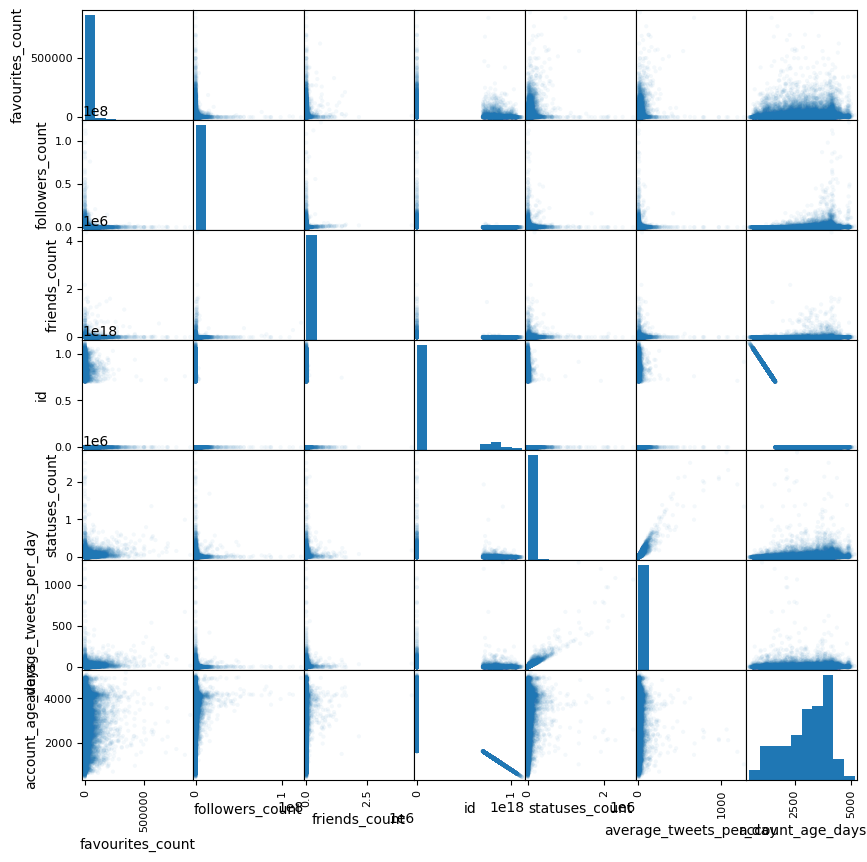

In [12]:
from pandas.plotting import scatter_matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scatter_matrix(numeric_data, alpha=0.05, figsize=(10, 10))
pass

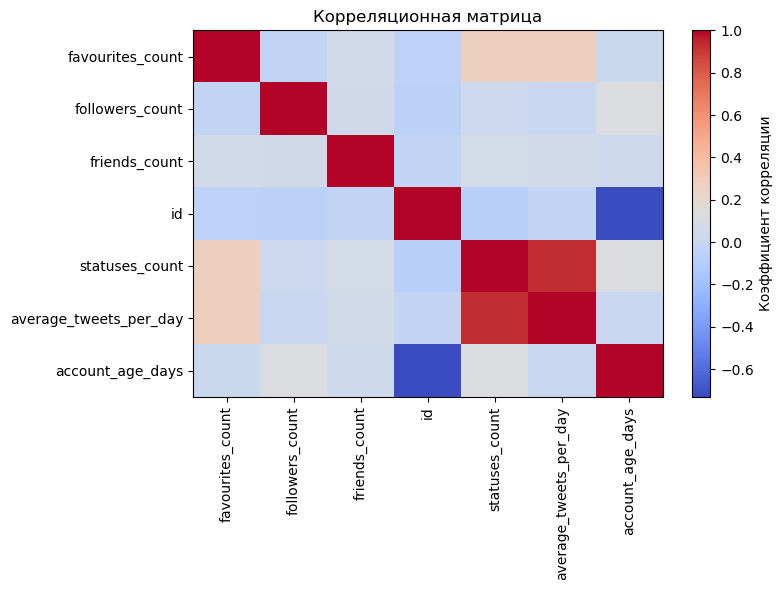

In [54]:
corr_data = numeric_data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_data, cmap='coolwarm', aspect='auto', interpolation='none')
plt.colorbar(label='Коэффициент корреляции')
plt.xticks(range(len(corr_data.columns)), corr_data.columns, rotation=90)
plt.yticks(range(len(corr_data.columns)), corr_data.columns)
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

In [86]:
corr_data

,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
favourites_count,1.000000,-0.024431,0.066202,-0.049557,0.264001,0.275568,0.024098
followers_count,-0.024431,1.000000,0.048482,-0.059866,0.031302,0.010845,0.119114
friends_count,0.066202,0.048482,1.000000,-0.029059,0.077872,0.059842,0.043834
id,-0.049557,-0.059866,-0.029059,1.000000,-0.085928,-0.020604,-0.730933
statuses_count,0.264001,0.031302,0.077872,-0.085928,1.000000,0.929172,0.115308
average_tweets_per_day,0.275568,0.010845,0.059842,-0.020604,0.929172,1.000000,0.009868
account_age_days,0.024098,0.119114,0.043834,-0.730933,0.115308,0.009868,1.000000


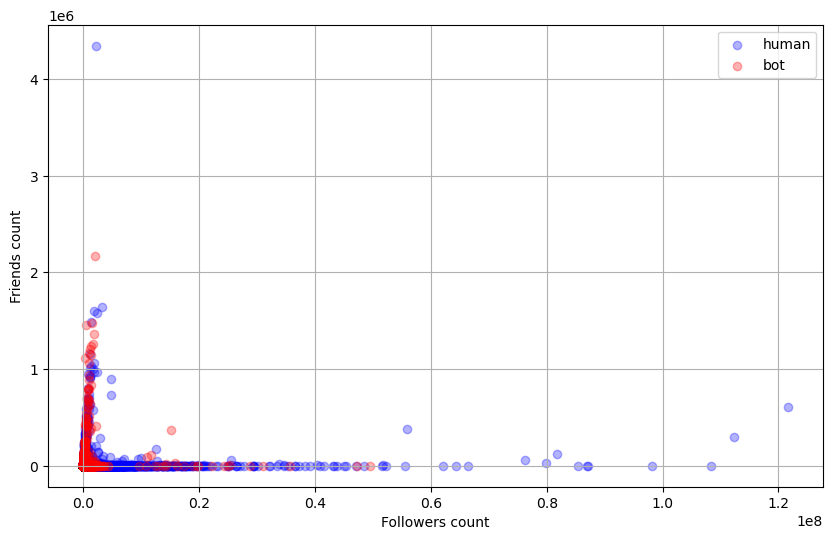

In [73]:
plt.figure(figsize=(10, 6))

plt.scatter(
    data[data['account_type'] == 'human']['followers_count'],
    data[data['account_type'] == 'human']['friends_count'],
    alpha=0.3,
    label='human',
    color='blue'
)

plt.scatter(
    data[data['account_type'] == 'bot']['followers_count'],
    data[data['account_type'] == 'bot']['friends_count'],
    alpha=0.3,
    label='bot',
    color='red'
)

plt.xlabel('Followers count')
plt.ylabel('Friends count')
plt.legend()
plt.grid(True)
plt.show()

Боты чаще всего имеют много подписок, но мало подписчиков

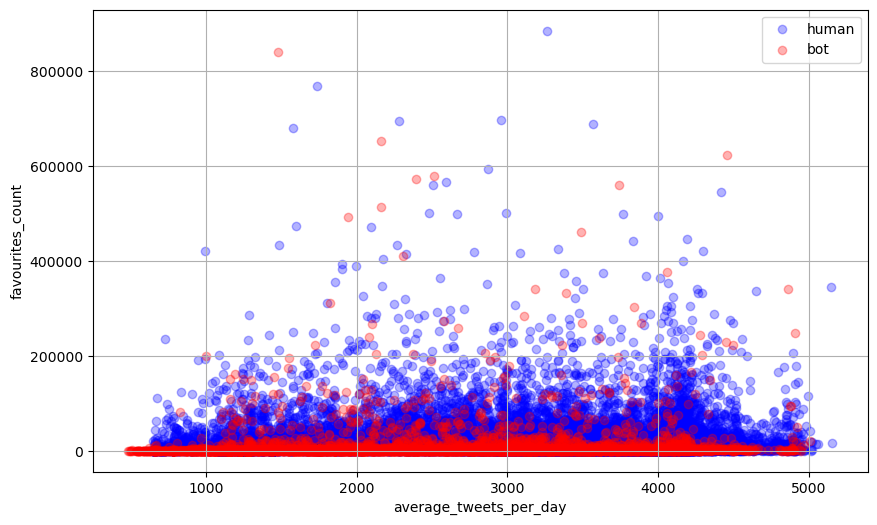

In [77]:
plt.figure(figsize=(10, 6))

plt.scatter(
    data[data['account_type'] == 'human']['account_age_days'],
    data[data['account_type'] == 'human']['favourites_count'],
    alpha=0.3,
    label='human',
    color='blue'
)

plt.scatter(
    data[data['account_type'] == 'bot']['account_age_days'],
    data[data['account_type'] == 'bot']['favourites_count'],
    alpha=0.3,
    label='bot',
    color='red'
)

plt.xlabel('average_tweets_per_day')
plt.ylabel('favourites_count')
plt.legend()
plt.grid(True)
plt.show()

Люди активно ставят лайки, и их активность не всегда связана с числом твитов.

Боты генерируют много контента, но почти не взаимодействуют с другими. Это отличительная черта автоматизированных аккаунтов.

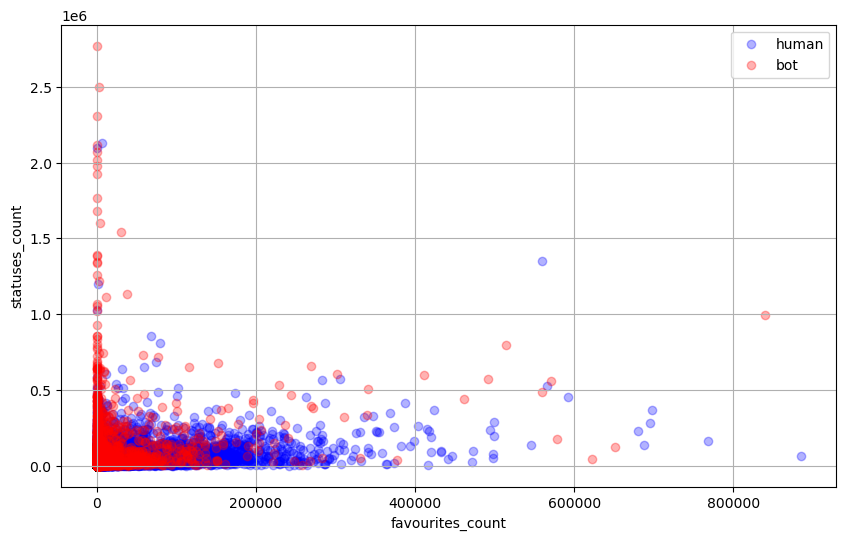

In [63]:
plt.figure(figsize=(10, 6))

plt.scatter(
    data[data['account_type'] == 'human']['favourites_count'],
    data[data['account_type'] == 'human']['statuses_count'],
    alpha=0.3,
    label='human',
    color='blue'
)

plt.scatter(
    data[data['account_type'] == 'bot']['favourites_count'],
    data[data['account_type'] == 'bot']['statuses_count'],
    alpha=0.3,
    label='bot',
    color='red'
)

plt.xlabel('favourites_count')
plt.ylabel('statuses_count')
plt.legend()
plt.grid(True)
plt.show()

Данное распределение подтверждает, что люди чаще проявляют социальное поведение: лайкают, читают и общаются. Боты генерируют много контента, но почти не вовлекаются в взаимодействия с другими пользователями.

## 5.Обработка категориальных и булевых признаков

In [129]:
data["description_length"] = data["description"].fillna("").astype(str).apply(len)
data["has_description"] = (data["description"].notna()) & (data["description"].astype(str).str.strip() != "")
data["has_profile_image"] = data["profile_image_url"].notna() & (data["profile_image_url"].astype(str) != "null")

In [133]:
lang_col = "lang"
top_langs = []
if lang_col in data.columns:
    top_langs = data[lang_col].value_counts().nlargest(10).index.tolist()
    data["lang_top"] = data[lang_col].apply(lambda x: x if x in top_langs else "other")

    lang_dummies = pd.get_dummies(data["lang_top"], prefix="lang")
else:
    lang_dummies = pd.DataFrame(index=data.index)

In [135]:
for bcol in ["default_profile", "default_profile_image", "geo_enabled", "verified", "has_description", "has_profile_image"]:
    if bcol in data.columns:
        data[bcol] = data[bcol].astype(int)

In [137]:
num_cols = []
for c in ["favourites_count", "followers_count", "friends_count", "statuses_count", "average_tweets_per_day", "account_age_days", "description_length"]:
    if c in data.columns:
        num_cols.append(c)

In [141]:
data.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,...,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,description_length,has_description,has_profile_image,lang_top
0,2016-10-15 21:32:11,0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,787405734442958848,en,...,best_in_dumbest,11041,0,7.870,1403,bot,129,1,1,en
1,2016-11-09 05:01:30,0,0,Photographing the American West since 1980. I ...,536,860,880,0,796216118331310080,en,...,CJRubinPhoto,252,0,0.183,1379,human,160,1,1,en
2,2017-06-17 05:34:27,0,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,875949740503859204,en,...,SVGEGENT,1001,0,0.864,1159,human,81,1,1,en
3,2016-07-21 13:32:25,1,0,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,1,756119643622735875,en,...,TinkerVHELPK5,1324,0,0.889,1489,human,97,1,1,en
4,2012-01-15 16:32:35,0,0,Loan coach at @mancity & Aspiring DJ,88,753678,116,1,464781334,en,...,JoleonLescott,4202,1,1.339,3138,human,36,1,1,en


In [153]:
bool_cols = [c for c in ["default_profile", "default_profile_image", "geo_enabled", "verified", "has_description", "has_profile_image"] if c in data.columns]
feature_cols = num_cols + bool_cols
X_data = data[feature_cols].copy()
if not lang_dummies.empty:
    X_data = pd.concat([X_data, lang_dummies], axis=1)

In [163]:
label_col = "account_type"

y_series = data[label_col].astype(str).copy()

In [165]:
le = LabelEncoder()
y = le.fit_transform(y_series)

## 3. Обработка пропущенных значений

In [175]:
imputer = SimpleImputer(strategy="median")
X_num = imputer.fit_transform(X_data)

feature_names = list(X_data.columns)

## 2.Разбиение данных на тестовую и тренировочную выборку

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.25, random_state=42, stratify=y
)

Train/test sizes: (28078, 24) (9360, 24)


## 6. Нормализация

In [195]:
X = X_num.astype(float)

means = np.mean(X, axis=0)
stds = np.std(X, axis=0, ddof=0)

stds_nozero = np.where(stds == 0, 1.0, stds)
X_std = (X - means) / stds_nozero

## 7. Запуск классификатора методом K ближайших соседей с оптимальным параметром

In [233]:
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1, 16))}
grid = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Лучшее k:", grid.best_params_)
best_knn = grid.best_estimator_

y_pred_train = best_knn.predict(X_train)
y_pred_test = best_knn.predict(X_test)

Лучшее k: {'n_neighbors': 9}


Метод k ближайших соседей хорошо подходит для этой задачи, потому что он умеет классифицировать объекты по набору числовых признаков без сложных предположений о данных. Также, он хорошо работает, когда классы похожи и имеют пересечения в признаках.


## 8.Вычисление ошибки на обучающей и тестовой выборках. Матрица рассогласования

In [224]:
train_acc = accuracy_score(y_train, y_pred_train)
test_acc  = accuracy_score(y_test, y_pred_test)

train_err = 1 - train_acc
test_err  = 1 - test_acc

print(f"Ошибка тренировочной выборки: {train_err:.4f}")
print(f"Ошибка тестовой выборки: {test_err:.4f}")

cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm, index = ['Bot', 'Human'], columns = ['Bot', 'Human'])

cm_df

Ошибка тренировочной выборки: 0.1665
Ошибка тестовой выборки: 0.2046


,Bot,Human
Bot,2138,968
Human,947,5307


Метод К ближайших соседей с оптимальным параметром и нормализованными признаками точнее классифицирует людей, чем ботов, с умеренной ошибкой на тестовой выборке (~20%).

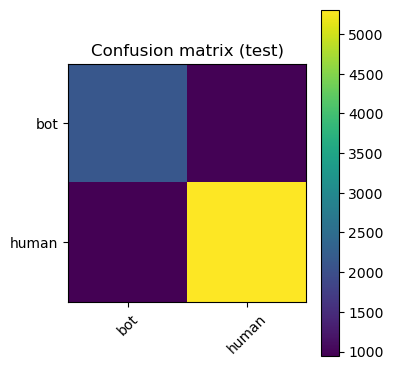

In [216]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='viridis')
plt.title("Confusion matrix (test)")
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.tight_layout()
plt.show()